Business Understanding.
The organisation aims to expand and it aims to purchase and operate airplanes for commercial and private enterprises while minimizing operational risks and maximizing profitability.

Objectives
1.Identify trends in aviation accidents over time.

2.Identify the models/makes with least purpose accidents.

3.Identify accident frequency by weather condition.

4.Identify highest broad phase of flights.

Research Questions
1.What is the total number of accidents recorded for each aircraft model?
2.What is the frequency of accidents per operational year for each model? 
3.Are there any patterns or trends in accident occurrences across different aircraft models such as weather conditions?


Methodology 
1.Data Collection- have access to a reliable data which includes aircrafts and number of accidents caused.
2.Data Preprocessing which involves Data cleaning, handle missing values, outliers, and inconsistencies. This may involve imputation or removal of problematic data points.

Success Criteria 
1.Low accident rate -The aircrafts selected must have no or very low accidents history.

2.The aircraft selected should show a declining trend in accidents showing increased reliability.

Limitations 
1.Missing values- The data has a lot of missing values

2.Outdated data-The data provided is from 1962 to 2023

3.Potential bias- The data is for the United states and international waters only.

Data Understanding

In [2]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
#reading the aviation data-used encoding='latin1' to allow pandas to read the file.
aviation_data = pd.read_csv('AviationData.csv', encoding='latin1')
aviation_data.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#last 5 rows
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:

#summary of the data
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
#summary statistics
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
#getting the number of columns and rows
aviation_data.shape

(88889, 31)

In [8]:
#columns
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

##Data cleaning

In [9]:
#checking for missing values
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [10]:
#dropping columns with most missing values
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Schedule', 'Air.carrier', 'Registration.Number']
aviation_data.drop(columns=columns_to_drop, inplace=True)

In [11]:
#checking if columns have been dropped
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [12]:
# Filling missing values in categorical columns with the mode
categorical_columns = ['Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
                       'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
                       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status']

for col in categorical_columns:
    aviation_data[col].fillna(aviation_data[col].mode()[0], inplace=True)


In [13]:
#filling missing values in numeric data with mean
numerical_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                     'Total.Minor.Injuries', 'Total.Uninjured']

for col in numerical_columns:
    aviation_data[col].fillna(aviation_data[col].mean(), inplace=True)


In [14]:
#checking if missing data has been filled
aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6084
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: int64

In [15]:
#replacing missing values in number of engines with median
aviation_data['Number.of.Engines'].fillna(aviation_data['Number.of.Engines'].median(), inplace=True)

In [16]:
#dropping rows in publication date with missing values
aviation_data.dropna(subset=['Publication.Date'], inplace=True)


In [17]:
#checking if there are any missing values
aviation_data.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [18]:
#checking for duplicates
aviation_data.duplicated().sum()

1

In [19]:
#drop duplicates
aviation_data.drop_duplicates(inplace=True)

##Visualisation

In [20]:
#plotting a heatmap using numeric values only to check the correlation
# Filter only numeric columns
numeric_data = aviation_data.select_dtypes(include=['number'])

In [21]:
corr_matrix = numeric_data.corr()

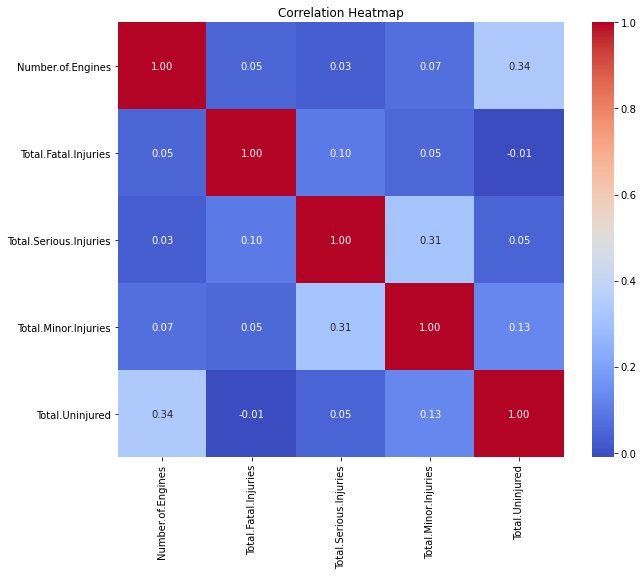

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
#capitalizing all values in make
aviation_data['Make'] = aviation_data['Make'].str.upper()

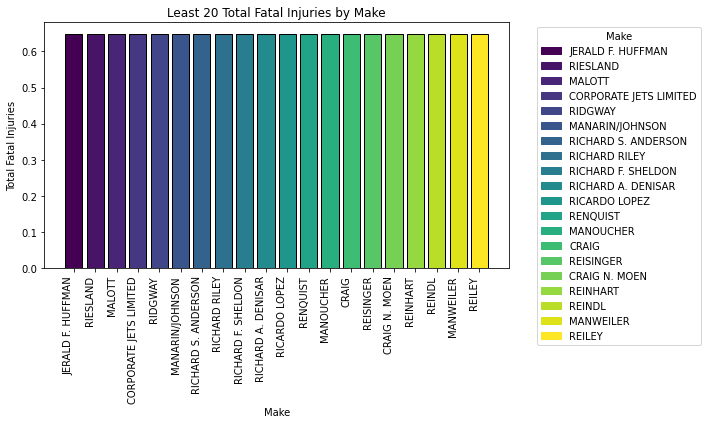

In [24]:
#plotting a bar graph of least 20 total fatal injuries against make
plt.figure(figsize=(10, 6))

# Aggregate data by Make and sum the total fatal injuries for each Make
make_fatal_injuries = aviation_data.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# Filter out makes with zero total fatal injuries
make_fatal_injuries = make_fatal_injuries[make_fatal_injuries['Total.Fatal.Injuries'] > 0]

least_fatal_injuries = make_fatal_injuries.sort_values(by='Total.Fatal.Injuries', ascending=True).head(20)
colors = plt.cm.viridis(np.linspace(0, 1, len(least_fatal_injuries)))
bars = plt.bar(least_fatal_injuries['Make'], least_fatal_injuries['Total.Fatal.Injuries'], color=colors, edgecolor='black')

#add legend manually
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = least_fatal_injuries['Make'].values

plt.legend(handles, labels, title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Least 20 Total Fatal Injuries by Make')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


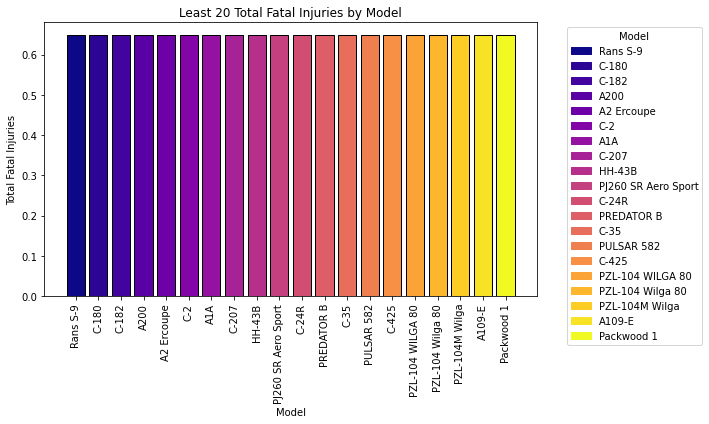

In [25]:
#plotting a bar graph of least 20 total fatal injuries against model
plt.figure(figsize=(10, 6))

# Group data by Model and sum the total fatal injuries for each model
model_fatal_injuries = aviation_data.groupby('Model')['Total.Fatal.Injuries'].sum().reset_index()

# Filter out models with zero total fatal injuries
model_fatal_injuries = model_fatal_injuries[model_fatal_injuries['Total.Fatal.Injuries'] > 0]
least_fatal_injuries = model_fatal_injuries.sort_values(by='Total.Fatal.Injuries', ascending=True).head(20)
colors = plt.cm.plasma(np.linspace(0, 1, len(least_fatal_injuries)))
bars = plt.bar(least_fatal_injuries['Model'], least_fatal_injuries['Total.Fatal.Injuries'], color=colors, edgecolor='black')
# Add legend manually
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = least_fatal_injuries['Model'].values
plt.legend(handles, labels, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Least 20 Total Fatal Injuries by Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




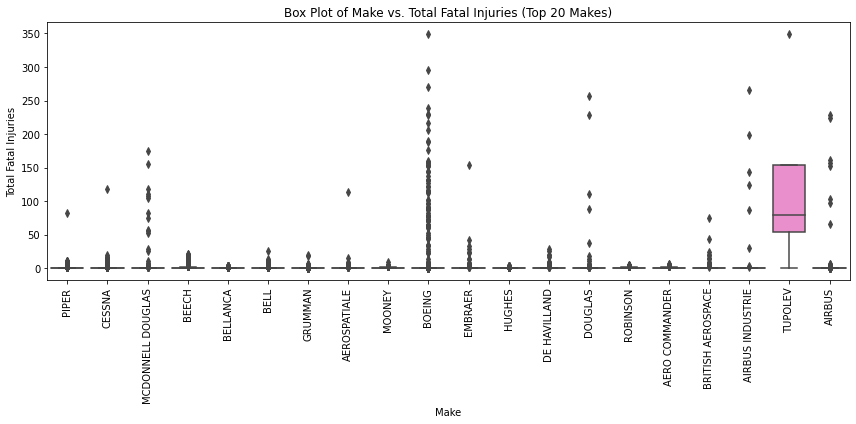

In [26]:
#plotting a box plot of Make vs. Total.Fatal.Injuries
# Grouping data by Make and compute the mean of total fatal injuries
make_fatal_injuries = aviation_data.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# Sorting by total fatal injuries to select the top 20 makes
top_makes = make_fatal_injuries.sort_values(by='Total.Fatal.Injuries', ascending=False).head(20)['Make']
filtered_data = aviation_data[aviation_data['Make'].isin(top_makes)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Total.Fatal.Injuries', data=filtered_data)
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Box Plot of Make vs. Total Fatal Injuries (Top 20 Makes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


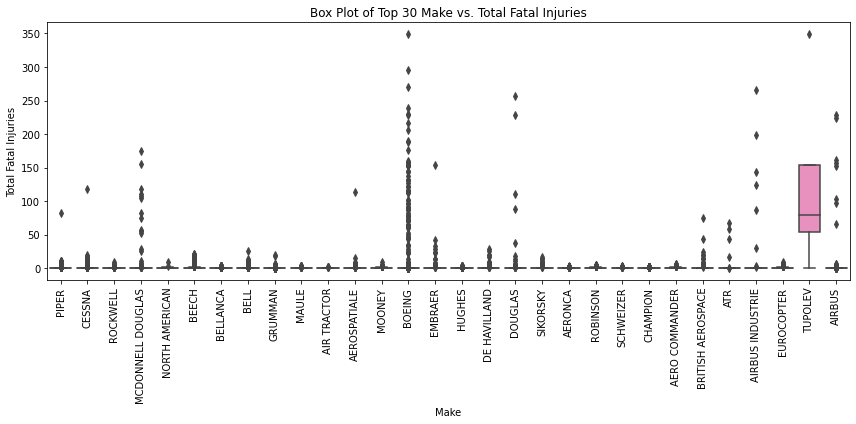

In [27]:
#plotting a box plot of top 30 Make vs. Total.Fatal.Injuries
plt.figure(figsize=(12, 6))

# Aggregating the data by Make and sum the Total Fatal Injuries for each Make
make_fatal_injuries = aviation_data.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# Sorting the aggregated data by Total.Fatal.Injuries in descending order
top_fatal_injuries = make_fatal_injuries.sort_values(by='Total.Fatal.Injuries', ascending=False).head(30)
top_fatal_injuries_data = aviation_data[aviation_data['Make'].isin(top_fatal_injuries['Make'])]
sns.boxplot(x='Make', y='Total.Fatal.Injuries', data=top_fatal_injuries_data)
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Box Plot of Top 30 Make vs. Total Fatal Injuries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



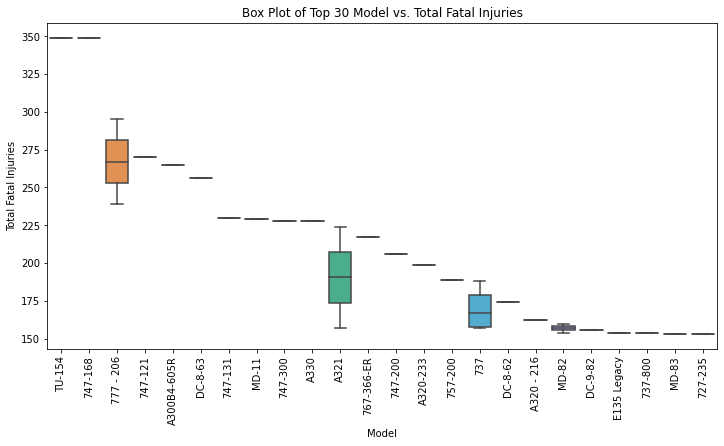

In [28]:
#plotting a box plot of top 30 Model vs. Total.Fatal.Injuries
plt.figure(figsize=(12, 6))
top_fatal_injuries = aviation_data.sort_values(by='Total.Fatal.Injuries', ascending=False).head(30)
sns.boxplot(x='Model', y='Total.Fatal.Injuries', data=top_fatal_injuries)
plt.xlabel('Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Box Plot of Top 30 Model vs. Total Fatal Injuries')
plt.xticks(rotation=90)
plt.show()


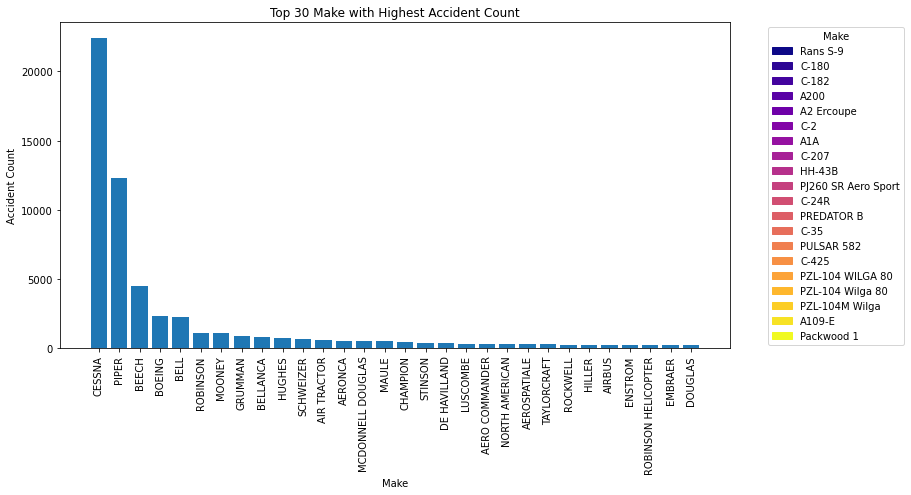

In [29]:
#plotting a bar graph of Accident number against top 30 make
plt.figure(figsize=(12, 6))
top_30_makes = aviation_data['Make'].value_counts().head(30)
plt.bar(top_30_makes.index, top_30_makes.values)
plt.legend(handles, labels, title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Make')
plt.ylabel('Accident Count')
plt.title('Top 30 Make with Highest Accident Count')
plt.xticks(rotation=90)
plt.show()


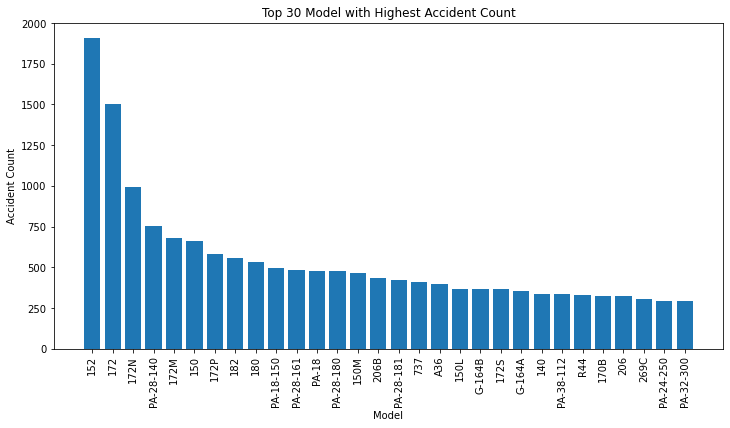

In [30]:
#plotting a bar graph of Accident number against top 30 model
plt.figure(figsize=(12, 6))
top_30_model = aviation_data['Model'].value_counts().head(30)
plt.bar(top_30_model.index, top_30_model.values)
plt.xlabel('Model')
plt.ylabel('Accident Count')
plt.title('Top 30 Model with Highest Accident Count')
plt.xticks(rotation=90)
plt.show()


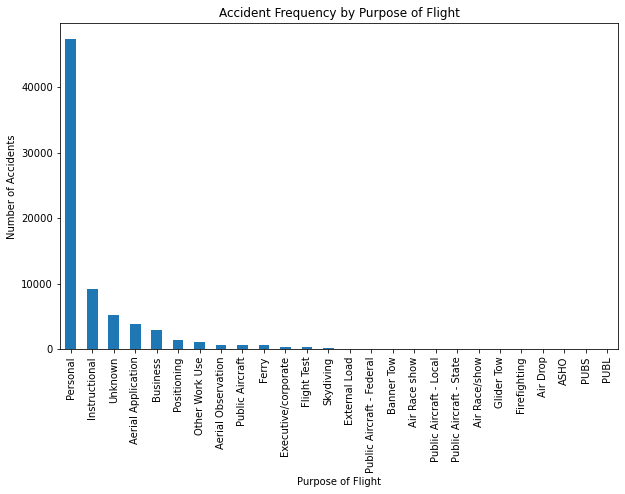

In [31]:
#plotting bar graph to show which airflight category is most likely to be involved in accidents
purpose_accidents = aviation_data['Purpose.of.flight'].value_counts()
purpose_accidents.plot(kind='bar', figsize=(10, 6))
plt.title("Accident Frequency by Purpose of Flight")
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.show()


In [32]:
#capitalizing all data in the weather condition column to avoid having two bars of unk and UNK
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].str.upper()

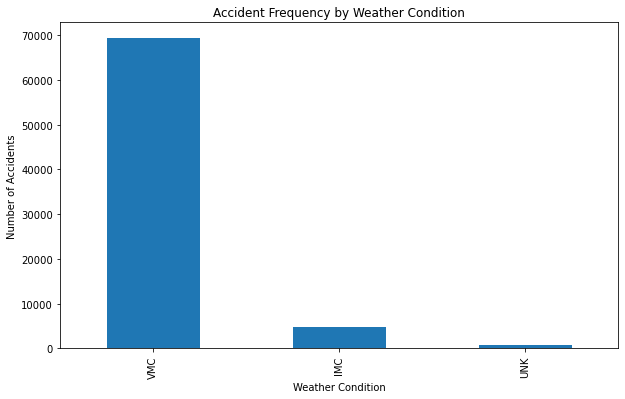

In [33]:
#plotting bar graph to show how weather conditions impact the severety of injuries
weather_injuries = aviation_data['Weather.Condition'].value_counts()
weather_injuries.plot(kind='bar', figsize=(10, 6))
plt.title("Accident Frequency by Weather Condition")
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

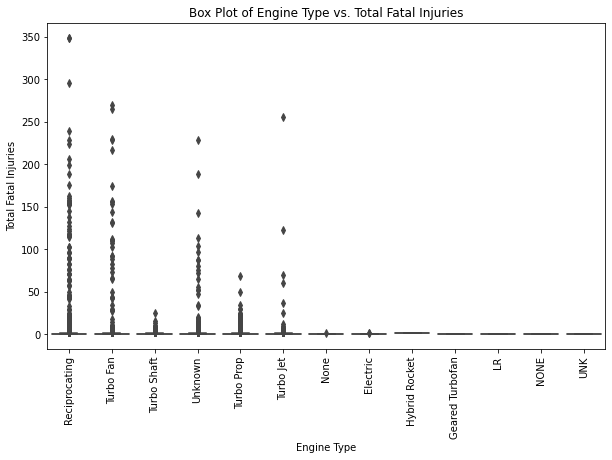

In [34]:
#plotting a box plot to show the severety of accidents depending on the engine type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine.Type', y='Total.Fatal.Injuries', data=aviation_data)
plt.xlabel('Engine Type')
plt.ylabel('Total Fatal Injuries')
plt.title('Box Plot of Engine Type vs. Total Fatal Injuries')
plt.xticks(rotation=90)
plt.show()



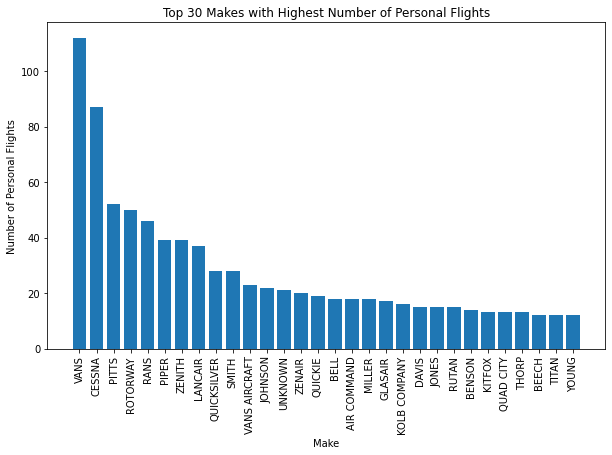

In [35]:
#plotting a bar graph to show the personal flight vs top 30 make
plt.figure(figsize=(10, 6))
personal_flight_makes = aviation_data[aviation_data['Amateur.Built'] == 'Yes']['Make'].value_counts().head(30)
plt.bar(personal_flight_makes.index, personal_flight_makes.values)
plt.xlabel('Make')
plt.ylabel('Number of Personal Flights')
plt.title('Top 30 Makes with Highest Number of Personal Flights')
plt.xticks(rotation=90)
plt.show()



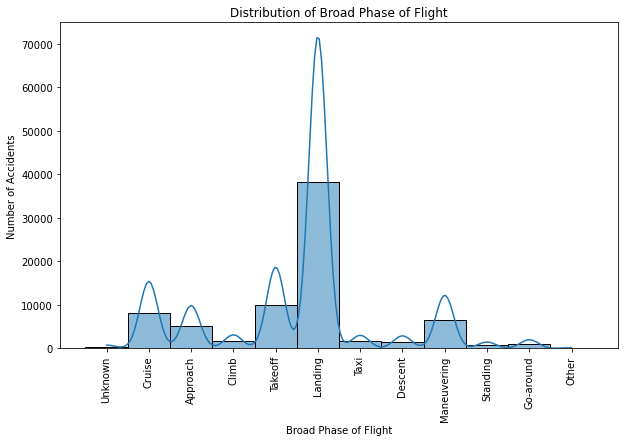

In [36]:
#plotting a histogram shpwing broad face of flight and number of accidents
plt.figure(figsize=(10, 6))
sns.histplot(data=aviation_data, x='Broad.phase.of.flight', bins=20, kde=True)
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Broad Phase of Flight')
plt.xticks(rotation=90)
plt.show()


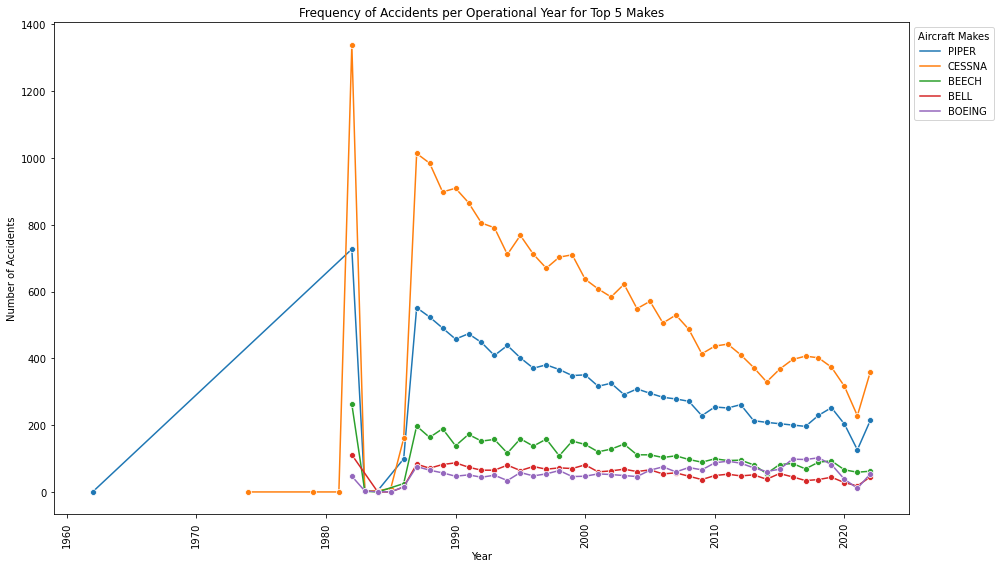

In [39]:
#frequency of accidents per operational year for each make
# Ensure the 'Year' column exists
aviation_data['Year'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce').dt.year

# Group data by year and model, counting accidents
year_make_counts = aviation_data.groupby(['Year', 'Make']).size().reset_index(name='Count')

# Filter for the top 5 models with the most accidents
top_makes = year_make_counts.groupby('Make')['Count'].sum().nlargest(5).index
filtered_data = year_make_counts[year_make_counts['Make'].isin(top_makes)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Year', y='Count', hue='Make', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Frequency of Accidents per Operational Year for Top 5 Makes')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Makes', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



Conclusion 
1.The analysis reveals that Cessna, Piper, Beech, and Boeing have the highest accident counts, with models like the 152, 172, PA-28-140, and 172M contributing significantly. In contrast, RANS S-9, C-180, A200, and A2 Ercoupe models show the lowest fatal injuries, making them safer options.

2.Fatalities are most associated with makes like Boeing, Tupolev, Douglas, and Airbus Industries, while makes like Jerald F. Huffman and Corporate Jets Limited have notably low fatal injuries.

3.The analysis shows a significant spike in accidents in 2020, likely due to disruptions caused by the COVID-19 pandemic. However, the overall trend before and after 2020 indicates a steady reduction in accidents.

4.Based on the analysis, we can conclude that the number of accidents is higher during landing and take-off phases. Therefore, further safety measures should be focused on these critical phases to improve overall aviation safety.

5.The analysis shows that engines with reciprocating, turbo fan, and turbo shaft technologies are associated with higher rates of fatal injuries, likely due to their complexity and operational demands. On the other hand, geared turbofan, hybrid, and electric engines tend to have lower fatal injury rates, possibly due to their more advanced safety features and design improvements.

6.To minimize risks and maximize profitability, the organization should focus on aircraft used for PUBL, PUBS, ASHO, and air drop operations, as these have lower accident rates. On the other hand, personal, instructional, and aerial application flights, which tend to have higher accident frequencies, require extra attention in terms of safety measures.